In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
import time
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from tensorflow.keras.metrics import MeanSquaredError

In [63]:

df = pd.read_excel(r'D:/paper/qb/data/lab_data.xlsx')
df.head()

,River,W,S,Q,U,H,D50,D84,R,qs
0,Bogardi1,0.300,0.0104,0.02747,1.06,0.087,0.0068,0.00816,0.0721,24.1
1,Bogardi1,0.300,0.0141,0.01566,0.92,0.057,0.0068,0.00816,0.0504,6.1
2,Bogardi1,0.823,0.0143,0.02288,0.69,0.040,0.0068,0.00816,0.0389,0.2
3,Bogardi1,0.823,0.0145,0.04978,0.82,0.074,0.0068,0.00816,0.0709,21.9
4,Bogardi1,0.823,0.0153,0.03582,0.78,0.056,0.0068,0.00816,0.0535,1.8


In [64]:
X=df.loc[:, [ 'H','S','Q','D50','D84','R']].values
y=df.loc[:, [ 'qs']].values

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler().fit(X)
X1 = scaler1.transform(X)
scaler2 = MinMaxScaler().fit(y)
y1 = scaler2.transform(y)


In [66]:

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
y_train=y_train.ravel()
y_test=y_test.ravel()


In [67]:
input_dim = X.shape[1]

In [68]:
def objective(X):
    x1,x2,x3,x4=X
    model = Sequential()
    model.add(Dense(units=x1, activation='relu', input_dim=input_dim))
    model.add(Dense(units=x2, activation='relu'))
    model.add(Dense(units=x3, activation='relu'))
    model.add(Dense(units=x4, activation='relu'))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics='accuracy')
    model.fit(X_train, y_train, epochs=50, batch_size=20, verbose=0)
    mse,mse = model.evaluate(X_train, y_train,batch_size=20,verbose=0)
    return mse
    
    

In [69]:
from sko.PSO import PSO
pso = PSO(func=objective, n_dim=4, pop=10, max_iter=60, lb=[7, 7, 7,7], ub=[64,64,64,64], w=0.8, c1=0.5, c2=0.5)
pso.run()
print('best_x is ', pso.gbest_x, 'best_y is', pso.gbest_y)

best_x is  [23.20831084 17.48038291 64.         29.92458065] best_y is [0.04083571]


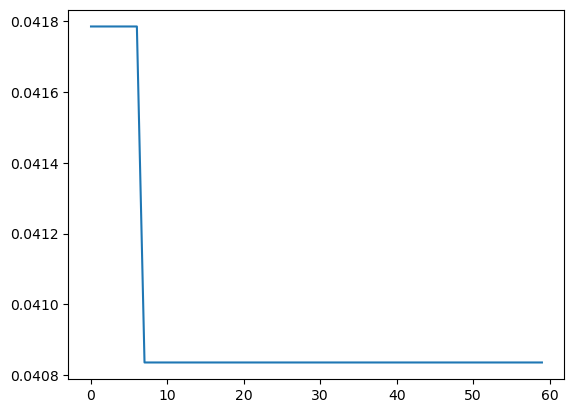

In [70]:
import matplotlib.pyplot as plt

plt.plot(pso.gbest_y_hist)
plt.show()